In [50]:
# TODO: short markdown readme on what this notebook does

In [51]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import json

# if looking for a particular export: provide name in format 'res_YYYY_MM_DD_THH_MM_SS'
RESULTS_DIR = None

In [66]:
# calculate last export generated if none is specified, read in files
if RESULTS_DIR == None:
    dir_list = next(os.walk('results/'))[1]
    RESULTS_DIR = max(dir_list)

full_path        = f'results/{RESULTS_DIR}/'
correctness_dump = f'{full_path}/results_correctness.json'
times_dump       = f'{full_path}/results_times.json'

print('Reading from results folder:', full_path)

Reading from results folder: results/res_2024_03_04_T20_37_14/


In [67]:
def json_to_df(path):
  # unzip the file, load in each line as an object
  g = open(path, 'rb')
  g = [json.loads(l) for l in g]

  # map to a dictionary, then load in as a dataframe
  dict_df = {i: d for (i, d) in enumerate(g)}
  return pd.DataFrame.from_dict(dict_df, orient='index')

times_df       = json_to_df(times_dump)
correctness_df = json_to_df(correctness_dump)

correctness_df.head()

""


In [68]:
# TODO: add basic set of plots for set of results (correctness/time), from selected(or last) result report

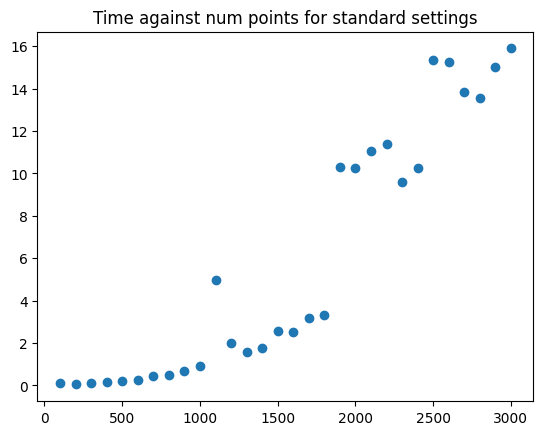

In [70]:
plt.title('Time against num points for standard settings')
plt.scatter(times_df['n_points'], times_df['time'])